# How to use KARABO

In [1]:
import numpy as np
from karabo.Imaging import imager, source_detection
from karabo.simulation import sky_model, telescope, observation, interferometer

## Simulation

The sky and telescope simulation is currently provided completely by OSKAR.

In [2]:
# Create a sky model containing three sources from a numpy array.
sky_data = np.array([
    [20.0, -30.0, 1, 0, 0, 0, 100.0e6, -0.7, 0.0, 0, 0, 0],
    [20.0, -30.5, 3, 2, 2, 0, 100.0e6, -0.7, 0.0, 600, 50, 45],
    [20.5, -30.5, 3, 0, 0, 2, 100.0e6, -0.7, 0.0, 700, 10, -10]])
sky = sky_model.SkyModel(sky_data)

### Telescope Module

Various observation parameters and meta information `params` must be passed to the telescope module `oskar.Interferometer` of OSKAR as `oskar.SettingsTree`.

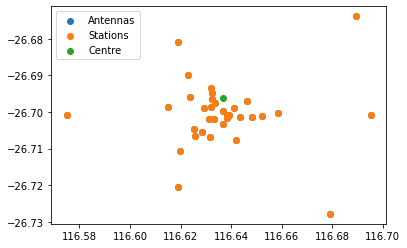

In [3]:
askap_tel = telescope.get_ASKAP_Telescope()
askap_tel.plot_telescope()

### Observation Simulation

Now the sky module must be passed to the interferometer and the simulation of the observation must be started to generate the measurement set.

In [4]:
observation_settings = observation.Observation(100e6,
                                               phase_centre_ra_deg=20,
                                               phase_centre_dec_deg=-30,
                                               number_of_channels=64,
                                               number_of_time_steps=24)

interferometer_sim = interferometer.InterferometerSimulation(channel_bandwidth_hz=1e6)
visibility_askap = interferometer_sim.run_simulation(askap_tel, sky, observation_settings)


W|                                                                   
W|== WARNING: No GPU capability available.
W|                                                                   


### Dirty Images

We can create dirty images of visibilites and display them as shown below

<SkyCoord (ICRS): (ra, dec) in deg
    (20., -30.)>
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 0  0


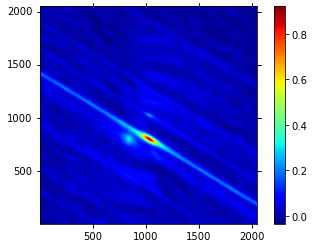

In [5]:
imager_askap = imager.Imager(visibility_askap, imaging_npixel=2048,
                             imaging_cellsize=3.878509448876288e-05)
dirty = imager_askap.get_dirty_image()
dirty.plot()

### Imaging

In [6]:
imager_askap.ingest_chan_per_blockvis = 1
imager_askap.ingest_vis_nchan = 16

deconvolved, restored, residual = imager_askap.imaging_rascil(
    clean_nmajor=0,
    clean_algorithm='mmclean',
    clean_scales=[0, 6, 10, 30, 60],
    clean_fractional_threshold=.3,
    clean_threshold=.12e-3,
    clean_nmoment=5,
    clean_psf_support=640,
    clean_restored_output='integrated')

2022-06-02 10:57:34,391 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/cvoegele/development/SKA/karabo/examples/dask-worker-space/worker-gq6h4mz_', purging
2022-06-02 10:57:34,391 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/cvoegele/development/SKA/karabo/examples/dask-worker-space/worker-4oj72wd9', purging
2022-06-02 10:57:34,391 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/cvoegele/development/SKA/karabo/examples/dask-worker-space/worker-z4cw2jo_', purging


LocalCluster(785a45e3, 'tcp://127.0.0.1:54137', workers=3, threads=9, memory=16.00 GiB)


2022-06-02 10:59:06,777 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.60 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:08,474 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.75 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:08,575 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.75 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:08,674 - distributed.worke

2022-06-02 10:59:17,474 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.76 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:17,575 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.81 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:17,674 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.85 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:17,774 - distributed.worke

2022-06-02 10:59:29,575 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.86 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:29,674 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.86 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:30,374 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.78 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:30,474 - distributed.worke

2022-06-02 10:59:52,474 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 4.01 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:52,575 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 4.02 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:52,674 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 4.02 GiB -- Worker memory limit: 5.33 GiB
2022-06-02 10:59:52,774 - distributed.worke

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 0  0


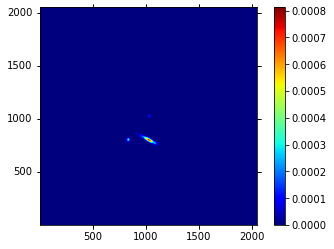

In [7]:
# Any of the resulting output images of the CLEAN algorithm can be displayed and saved.
deconvolved.plot()
deconvolved.save_as_fits("./deconvolved_ASKAP_observation.fits")
restored.save_as_fits("./restored.fits")

## Analysis via Source Detection

Source Detection on restored image.

In [ ]:
detection_result = source_detection.detect_sources_in_image(restored)
restored.plot()

stty: stdin isn't a terminal


In [ ]:
sky.setup_default_wcs()
detection_evaluation = source_detection.map_sky_to_detection(sky, 3.878509448876288e-05, 2048, detection_result, 10)
detection_evaluation.plot()